In [1]:
pip install bioinfokit

Processing ./.cache/pip/wheels/40/b8/82/23dd1b441e2c834181d4c595cff79f091212eb2c482e0550e2/bioinfokit-2.0.8-py3-none-any.whl
Processing ./.cache/pip/wheels/82/e4/64/dd790d424818bc2f59c11471a1eee5dc8cfcd3f8ee8c4812fa/matplotlib_venn-0.11.6-py3-none-any.whl
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached textwrap3-0.9.2-py2.py3-none-any.whl (12 kB)
Processing ./.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63/adjustText-0.7.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pingouin

Processing ./.cache/pip/wheels/8e/f4/3f/2629f2a31641ee865256bd1a03e0f3c66cea7ba4fa30ca7f9e/pingouin-0.5.1-py3-none-any.whl
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
Processing ./.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a/littleutils-0.2.2-py3-none-any.whl
  Using cached xarray-2022.3.0-py3-none-any.whl (870 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
#here we are importing the library for this project, which include stats libraries and a handful of visualizations
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from bioinfokit.analys import stat
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from scipy import stats
import pingouin as pg
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#here we load in the dataframe
d = pd.read_csv('diabetes.csv')

In [5]:
#looking at the shape of the df
d.shape

(768, 9)

In [6]:
#looking at collumn titles
d.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
#seeing what the top and bottom of the df looks like
d.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
d.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [9]:
#checking the value types
d.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
#use the function to see the overall description of the data
d.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [11]:
#checking the variation of responses for each column
d.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
#checking to see if there are any missing values
d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
#checking to the types of values in glucose
d['Glucose'].value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

<AxesSubplot:xlabel='Pregnancies'>

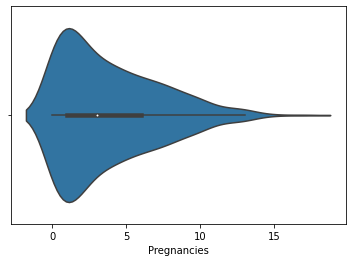

In [14]:
#checking dist of pregnancies
sns.violinplot(d.Pregnancies)

<AxesSubplot:xlabel='Glucose'>

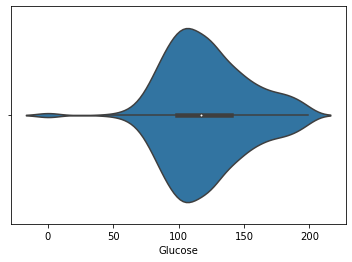

In [15]:
#checking dist of glucose
#I notice there are 0's within this dist
#as far as my understanding goes 0 glucose is fatal meaning something does not add up in the data
sns.violinplot(d.Glucose)

<AxesSubplot:xlabel='Insulin'>

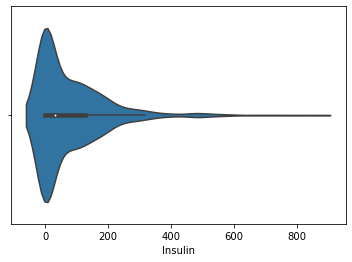

In [16]:
#checking dist of insulin
sns.violinplot(d.Insulin)

<AxesSubplot:xlabel='BloodPressure'>

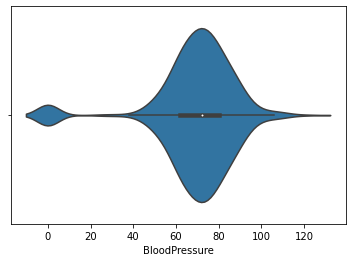

In [17]:
#checking dist of blood pressure there is a lot of 0s here as well
#0 blood pressure is fatal so again something doesnt add up
sns.violinplot(d.BloodPressure)

<AxesSubplot:xlabel='BMI'>

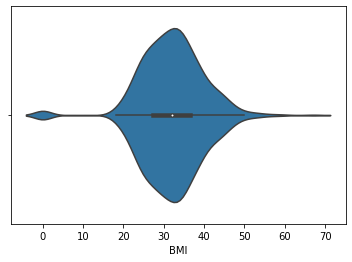

In [18]:
#cheking dist of bmi, there seems to be missing values here as well
sns.violinplot(d.BMI)

In [19]:
#importing KNNImputer
#KNNImputer will fill in the missing data rows that have 0's 
#using k nearest neighbour to input the 0s with the mean of its closest neighbours
#from sklearn.impute import KNNImputer


In [20]:
#creating the procedure to input missing value with the k nearest neighbour defined mean
#def impute(d):
 #   impute_d = d[(d['Glucose'] == 0) | (d['BloodPressure'] == 0) | (d['BMI'] == 0)]
    
  #  imputer = KNNImputer(missing_values=0)
   # impute_values = imputer.fit_transform(impute_d[['Glucose', 'BloodPressure', 'BMI']]).tolist()
    #impute_indexes = impute_d.index.tolist()

   # for index, value in zip(impute_indexes, impute_values):
        #d.loc[index, ['Glucose', 'BloodPressure', 'BMI']] = value
        
    #return d

In [21]:
#cleaned_df = impute(d.copy())
#instead of using this code I am going to try to replace the values of 

In [22]:
#Here I am setting the 0 values in glucose, bloodpressure, bmi, skinthickness, and bmi to NaN values
cols = ["Glucose","BloodPressure","BMI","SkinThickness","Insulin"]
d[cols] = d[cols].replace({0:np.nan})

In [23]:
#Here I am checking to see the nan values I created
#it seems that SkinThickness annd Insulin have a very high number of NaN values
d.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [24]:
#I just wanted to make sure the 0 values are gone from the columns I changed
d.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [25]:
d['Glucose'].median()




117.0

In [26]:
d['BloodPressure'].median()


72.0

In [27]:
d['SkinThickness'].median()

29.0

In [28]:
d['Insulin'].median()


125.0

In [29]:
d['BMI'].median()


32.3

In [30]:
d.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [31]:
cleaned_df = d.fillna(d.median())

In [32]:
#checking the description of data with our updated values
#we see the largest change in the mean and std in Skin Thickness and Insulin
#most likely due to the vast amounts of info that was missing
cleaned_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [33]:
#I think I want to split this dataset into two based on the outcome and then calculate the t-scores to see if there is a significance in mean
df1 = cleaned_df[cleaned_df['Outcome']== 1] #gets the subset of the df where the people have diabetes

df2 = cleaned_df[cleaned_df['Outcome']== 0] #gets the subset of the df where the people do not have diabetes



In [34]:
df2.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1             1     85.0           66.0           29.0    125.0  26.6   
3             1     89.0           66.0           23.0     94.0  28.1   
5             5    116.0           74.0           29.0    125.0  25.6   
7            10    115.0           72.0           29.0    125.0  35.3   
10            4    110.0           92.0           29.0    125.0  37.6   

    DiabetesPedigreeFunction  Age  Outcome  
1                      0.351   31        0  
3                      0.167   21        0  
5                      0.201   30        0  
7                      0.134   29        0  
10                     0.191   30        0

In [35]:
import statistics as st

In [36]:
df1.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  142.130597      75.123134      31.686567  164.701493   
std       3.741239   29.568839      11.951672       8.662994  100.932249   
min       0.000000   78.000000      30.000000       7.000000   14.000000   
25%       1.750000  119.000000      68.000000      29.000000  125.000000   
50%       4.000000  140.000000      74.000000      29.000000  125.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  268.000000                268.000000  268.000000    268.0  
mean    35.383582                  0.550500   37.067164      1.0  
std      6.595603                  0.372354   10.968254      0.0  
min     22.900000                  0.088000   21.000000      1.0  
25%     30.900000                  0.262500   28.000000      1.0  
50%     34.250000                  0.449000   36.000000      1.0  
75%     38.775000                  0.728000   44.000000      1.0  
max     67.100000                  2.420000   70.000000      1.0

In [37]:
df2.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.000000     500.000000     500.000000  500.000000   
mean      3.298000  110.682000      70.920000      27.726000  127.792000   
std       3.017185   24.707201      11.929385       8.552966   74.447469   
min       0.000000   44.000000      24.000000       7.000000   15.000000   
25%       1.000000   93.000000      63.500000      22.000000   95.000000   
50%       2.000000  107.500000      72.000000      29.000000  125.000000   
75%       5.000000  125.000000      78.000000      31.000000  125.000000   
max      13.000000  197.000000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  500.000000                500.000000  500.000000    500.0  
mean    30.885600                  0.429734   31.190000      0.0  
std      6.504128                  0.299085   11.667655      0.0  
min     18.200000                  0.078000   21.000000      0.0  
25%     25.750000                  0.229750   23.000000      0.0  
50%     30.400000                  0.336000   27.000000      0.0  
75%     35.300000                  0.561750   37.000000      0.0  
max     57.300000                  2.329000   81.000000      0.0

In [38]:
df_bmi = pd.cut(cleaned_df["BMI"],bins=[0,18.5,25,30,99],labels=[1,2,3,4])
cleaned_df.insert(5,'BMI_cat',df_bmi)

#these categories are meant to represent the categoris for underweight (0-18.5), normal (18.5-25), overweight(25-30), obese(30 +) for bmi

In [39]:
df_age = pd.cut(cleaned_df["Age"],bins=[0,14,24,64,200],labels=[1,2,3,4])
cleaned_df.insert(8,'Age_cat',df_age)

#these categories are meant to represent the categoris for children(0-14), youth (15-24), adult (25-64), seniors(65+) 

In [40]:
cleaned_df.dtypes

Pregnancies                    int64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI_cat                     category
BMI                          float64
DiabetesPedigreeFunction     float64
Age_cat                     category
Age                            int64
Outcome                        int64
dtype: object

In [41]:
#here we are changing the category values to integer values
for col in ['BMI_cat', 'Age_cat']:
    cleaned_df[col] = cleaned_df[col].astype('float64')


## EXPLORATORY DATA ANALYSIS

In [42]:

#comparing the violin plots for age based on outcome
#we can see that there is a larger range of older people who happen to have diabetes
o_age = px.violin(cleaned_df, x = "Outcome", y = "Age", box= True)
o_age.show()

hist_age_outcome = px.histogram(cleaned_df, x="Age", color="Outcome")#histogram to compare age by diabetes outcome
hist_age_outcome.show()

tStat, pValue = stats.ttest_ind(df1["Age"], df2["Age"], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic


P-Value:1.2015125273113395e-11 T-Statistic:6.92073837898804


In [43]:
#comparing the violin plots of glucose level for those that have diabetes and those that do not
#we can see that the glucose level is generally higher in those with diabetes
o_glucose = px.violin(cleaned_df, x = "Outcome", y = "Glucose", box= True) 
o_glucose.show()

hist_glucose_outcome = px.histogram(cleaned_df, x="Glucose", color="Outcome")#histogram to compare age by diabetes outcome
hist_glucose_outcome.show()

tStat, pValue = stats.ttest_ind(df1["Glucose"], df2["Glucose"], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:3.5421485614431447e-41 T-Statistic:14.852653441079662


In [44]:
#comparing the violin plots of BMI level for outcome
#from visualization it seems like those with diabetes have a slightly higher bmi
o_bmi = px.violin(cleaned_df, x = "Outcome", y = "BMI", box= True) 
o_bmi.show()

hist_BMI_outcome = px.histogram(cleaned_df, x="BMI", color="Outcome")#histogram to compare age by diabetes outcome
hist_BMI_outcome.show()

scat_BMI_outcome = px.scatter(cleaned_df, x="BMI", color="Outcome")
scat_BMI_outcome.show()


tStat, pValue = stats.ttest_ind(df1["BMI"], df2["BMI"], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:2.552895685742694e-18 T-Statistic:9.051746949833985


In [45]:
#comparing the violin plot for outcome and bloodpressure
#The distributions seem pretty similar to me.
o_bp = px.violin(cleaned_df, x = "Outcome", y = "BloodPressure", box= True) 
o_bp.show()

hist_bp_outcome = px.histogram(cleaned_df, x="BloodPressure", color="Outcome")#histogram to compare age by diabetes outcome
hist_bp_outcome.show()

scat_bp_outcome = px.scatter(cleaned_df, x="BloodPressure", color="Outcome")
scat_bp_outcome.show()

tStat, pValue = stats.ttest_ind(df1["BloodPressure"], df2["BloodPressure"], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:4.2016769212674544e-06 T-Statistic:4.648351130863798


In [46]:
#comparing the violin plot for outcome and Pregnancies
#The distributions seem pretty similar to me.
o_preg = px.violin(cleaned_df, x = "Outcome", y = "Pregnancies", box= True) 
o_preg.show()

hist_preg_outcome = px.histogram(cleaned_df, x="Pregnancies", color="Outcome")#histogram to compare age by diabetes outcome
hist_preg_outcome.show()

scat_preg_outcome = px.scatter(cleaned_df, x="Pregnancies", color="Outcome")
scat_preg_outcome.show()


tStat, pValue = stats.ttest_ind(df1["Pregnancies"], df2["Pregnancies"], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:6.821925600457145e-09 T-Statistic:5.9069614794974905


In [47]:
#comparing the violin plot for outcome and Diabetes Pedigree Function
#The distributions seem pretty similar to me.
o_dpf = px.violin(cleaned_df, x = "Outcome", y = "DiabetesPedigreeFunction", box= True) 
o_dpf.show()

hist_dpf_outcome = px.histogram(cleaned_df, x="DiabetesPedigreeFunction", color="Outcome")#histogram to compare age by diabetes outcome
hist_dpf_outcome.show()

scat_dpf_outcome = px.scatter(cleaned_df, x="DiabetesPedigreeFunction", color="Outcome")
scat_dpf_outcome.show()

tStat, pValue = stats.ttest_ind(df1["Pregnancies"], df2["DiabetesPedigreeFunction"], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:5.976001865851381e-53 T-Statistic:19.37736877676795


In [48]:
age_bmi = px.violin(cleaned_df, x = ["Age", "BMI", "DiabetesPedigreeFunction"], box= True) 
age_bmi.show()


tStat, pValue = stats.ttest_ind(cleaned_df["Age"], cleaned_df["BMI"], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.11022253700524726 T-Statistic:1.5983413028443678


In [49]:
tStat, pValue = stats.ttest_ind(cleaned_df["Age"], cleaned_df["DiabetesPedigreeFunction"], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.0 T-Statistic:77.18906025255926


In [50]:
tStat, pValue = stats.ttest_ind(cleaned_df["BMI"], cleaned_df["DiabetesPedigreeFunction"], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.0 T-Statistic:128.7705976976488


In [51]:
tStat, pValue = stats.ttest_ind(cleaned_df["Glucose"], cleaned_df["DiabetesPedigreeFunction"], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.0 T-Statistic:110.32687420166484


In [52]:
o_bmi = px.violin(cleaned_df, x = "Outcome", y = "BMI", box= True) 
o_bmi.show()

hist_BMI_outcome = px.histogram(cleaned_df, x="BMI", color="Outcome")#histogram to compare age by diabetes outcome
hist_BMI_outcome.show()

scat_BMI_outcome = px.scatter(cleaned_df, x="BMI", color="Outcome")
scat_BMI_outcome.show()

tStat, pValue = stats.ttest_ind(cleaned_df["BloodPressure"], cleaned_df["BMI"], equal_var = False) #run independent sample T-Test
print("BloodPressure by BMI P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

tStat, pValue = stats.ttest_ind(cleaned_df["BloodPressure"], cleaned_df["Age"], equal_var = False) #run independent sample T-Test
print("BloodPressure by Age P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

#we can see there is a pretty siginificant t stat and p value

BloodPressure by BMI P-Value:0.0 T-Statistic:79.532981483876
BloodPressure by Age P-Value:0.0 T-Statistic:64.3019958291131


In [53]:
#tStat, pValue = stats.ttest_ind(bmi_df1["BloodPressure"], bmi_df2["BloodPressure"], equal_var = False) #run independent sample T-Test
#print("Underweight and Normal P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

#tStat, pValue = stats.ttest_ind(bmi_df1["BloodPressure"], bmi_df3["BloodPressure"], equal_var = False) #run independent sample T-Test
#print("Underweight and Overweight P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

#tStat, pValue = stats.ttest_ind(bmi_df1["BloodPressure"], bmi_df4["BloodPressure"], equal_var = False) #run independent sample T-Test
#print("Underweight and Obese P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

#tStat, pValue = stats.ttest_ind(bmi_df2["BloodPressure"], bmi_df3["BloodPressure"], equal_var = False) #run independent sample T-Test
#print("Normal by Overweight P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

#tStat, pValue = stats.ttest_ind(bmi_df2["BloodPressure"], bmi_df4["BloodPressure"], equal_var = False) #run independent sample T-Test
#print("Normal by Obese P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

#tStat, pValue = stats.ttest_ind(bmi_df3["BloodPressure"], bmi_df4["BloodPressure"], equal_var = False) #run independent sample T-Test
#print("Overweight by Obese P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic



In [119]:
bp_bmi = px.violin(cleaned_df, x = "BMI_cat", y = "BloodPressure", box= True, title="Violin Plot for Blood Pressure Based on BMI Grouping") 
bp_bmi.show()

hist_bp_bmi = px.histogram(cleaned_df, x="BloodPressure", color="BMI_cat")#histogram to compare age by diabetes outcome
hist_bp_bmi.show()

scat_bp_bmi = px.scatter(cleaned_df, x="BloodPressure", color="BMI_cat")
scat_bp_bmi.show()


tStat, pValue = stats.ttest_ind(cleaned_df["BloodPressure"], cleaned_df["BMI"], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic



P-Value:0.0 T-Statistic:79.532981483876


In [120]:
bp_age = px.violin(cleaned_df, x = "Age_cat", y = "BloodPressure", box= True,  title="Violin Plot for Blood Pressure Based on Age Grouping") 
bp_age.show()

hist_bp_age = px.histogram(cleaned_df, x="BloodPressure", color="Age_cat")#histogram to compare age by diabetes outcome
hist_bp_age.show()

scat_bp_age = px.scatter(cleaned_df, x="BloodPressure", color="Age_cat")
scat_bp_age.show()


tStat, pValue = stats.ttest_ind(cleaned_df["BloodPressure"], cleaned_df["Age"], equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic




P-Value:0.0 T-Statistic:64.3019958291131


## ANOVAS

In [57]:
#MY Research question will be to test whether there is a relationship between BMI and Age to a person's blood pressure

bp_bmi = pg.anova(data=cleaned_df, dv='BloodPressure', between = ["BMI_cat"], detailed=True)
print(bp_bmi)

#in this one way anova test we can see that there is a significant 

    Source             SS   DF           MS          F         p-unc       np2
0  BMI_cat    5045.902188    3  1681.967396  11.988471  1.122948e-07  0.044959
1   Within  107188.242344  764   140.298747        NaN           NaN       NaN


In [58]:
bp_bmi_ph = pg.pairwise_tukey(dv='BloodPressure', between='BMI_cat', effsize = 'cohen', data=cleaned_df)
print(bp_bmi_ph)

#negative cohen score which mean the score of mean B is larger than score of mean A which correlates to the idea that the larger somone is the more bloodpressure they would have.
#pretty high tukey rate when test 0-3 were run meaning not statistically significant

pg.multicomp([0.9])

     A    B    mean(A)    mean(B)      diff        se         T   p-tukey  \
0  1.0  2.0  69.500000  68.111111  1.388889  6.031065  0.230289  0.995696   
1  1.0  3.0  69.500000  69.811111 -0.311111  5.987831 -0.051957  0.999950   
2  1.0  4.0  69.500000  74.355042 -4.855042  5.947221 -0.816355  0.846757   
3  2.0  3.0  68.111111  69.811111 -1.700000  1.441700 -1.179163  0.640222   
4  2.0  4.0  68.111111  74.355042 -6.243931  1.262461 -4.945841  0.000006   
5  3.0  4.0  69.811111  74.355042 -4.543931  1.036428 -4.384223  0.000078   

      cohen  
0  0.117257  
1 -0.026266  
2 -0.409889  
3 -0.143523  
4 -0.527146  
5 -0.383623  


In [136]:

pvals = [.995696,.999950,.846757,.640222,.000006,.000078]
pg.multicomp(pvals,alpha=0.05, method='bonf')#bonferoni correction of tukey

(array([False, False, False, False,  True,  True]),
 array([1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 3.60e-05, 4.68e-04]))

In [59]:
#One way Anova of Blood Pressure and Age
bp_age = cleaned_df.anova(dv='BloodPressure', between = ["Age_cat"], detailed=True)
print(bp_age)

    Source             SS   DF           MS          F         p-unc       np2
0  Age_cat    7216.299917    2  3608.149959  26.283483  9.126899e-12  0.064297
1   Within  105017.844614  765   137.278228        NaN           NaN       NaN


In [60]:
#Posthoc for Blood Pressure and Age
bp_age_ph = pg.pairwise_tukey(dv='BloodPressure', between='Age_cat', effsize = 'cohen', data=cleaned_df)
print(bp_age_ph)


     A    B    mean(A)    mean(B)       diff        se         T  \
0  2.0  3.0  67.680365  74.110694  -6.430329  0.940425 -6.837685   
1  2.0  4.0  67.680365  79.375000 -11.694635  3.034259 -3.854197   
2  3.0  4.0  74.110694  79.375000  -5.264306  2.972784 -1.770833   

        p-tukey     cohen  
0  4.924616e-11 -0.548823  
1  3.698304e-04 -0.998127  
2  1.801334e-01 -0.449304  


In [137]:
#Bonferoni ^
pvals2 = [0.00000000004924616,0.000369830,0.1801334]
pg.multicomp(pvals2,alpha=0.05, method='bonf')#bonferoni correction of tukey


(array([ True,  True, False]),
 array([1.4773848e-10, 1.1094900e-03, 5.4040020e-01]))

In [61]:
#Two Way ANOVA
bp_age_bmi = cleaned_df.anova(dv='BloodPressure', between = ["Age_cat","BMI_cat"], detailed=True)
print(bp_age_bmi)

              Source             SS     DF            MS           F  \
0            Age_cat    5290.713889    2.0   2645.356945   20.008582   
1            BMI_cat  101727.171011    3.0  33909.057004  256.476600   
2  Age_cat * BMI_cat    4013.110322    6.0    668.851720    5.058967   
3           Residual  100083.813280  757.0    132.211114         NaN   

           p-unc       np2  
0   3.406243e-09  0.050209  
1  8.125195e-115  0.504072  
2   4.217131e-05  0.038552  
3            NaN       NaN  


In [139]:
pvals3 = [0.000000003406243,0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000008125195,0.00004217131]
pg.multicomp(pvals3,alpha=0.05, method='bonf')#bonferoni correction of tukey

(array([ True,  True,  True]),
 array([1.0218729e-008, 2.4375585e-115, 1.2651393e-004]))

In [62]:
age_bmi = pg.anova(data=cleaned_df, dv='Age', between = ["BMI_cat"], detailed=True)
print(age_bmi)

    Source             SS   DF          MS         F     p-unc      np2
0  BMI_cat     640.724822    3  213.574941  1.547561  0.200843  0.00604
1   Within  105437.711376  764  138.007476       NaN       NaN      NaN


In [63]:
bmi_age = pg.anova(data=cleaned_df, dv='BMI', between = "Age_cat", detailed=True)
print(bmi_age)

    Source            SS   DF          MS          F     p-unc     np2
0  Age_cat    931.725172    2  465.862586  10.089351  0.000047  0.0257
1   Within  35322.873995  765   46.173691        NaN       NaN     NaN


In [64]:
bmi_age_ph = pg.pairwise_tukey(dv='BMI', between='Age_cat', effsize = 'cohen', data=cleaned_df)
print(bmi_age_ph)
#in this tukey and cohen test we  can see that there is a significant difference between the means of those considered adults and those considered youths
#we can also see that even though tests 1 and 2 wielded signficiant cohen's d the tukey value was not signficant

     A    B    mean(A)    mean(B)      diff        se         T   p-tukey  \
0  2.0  3.0  30.896347  33.178236 -2.281889  0.545407 -4.183830  0.000095   
1  2.0  4.0  30.896347  29.706250  1.190097  1.759743  0.676290  0.777373   
2  3.0  4.0  33.178236  29.706250  3.471986  1.724090  2.013808  0.109552   

      cohen  
0 -0.335813  
1  0.175140  
2  0.510953  


In [140]:
pvals4 = [0.000095,0.777373,0.109552]
pg.multicomp(pvals4,alpha=0.05, method='bonf')#bonferoni correction of tukey

(array([ True, False, False]), array([2.85000e-04, 1.00000e+00, 3.28656e-01]))

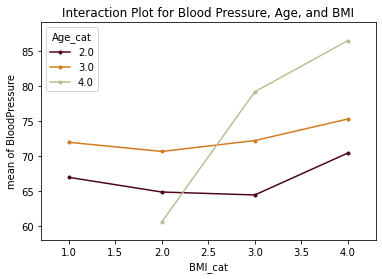

In [141]:
#Interaction Plot
fig = interaction_plot(x=cleaned_df['BMI_cat'], trace=cleaned_df['Age_cat'], response=cleaned_df['BloodPressure'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.title("Interaction Plot for Blood Pressure, Age, and BMI")
plt.show()

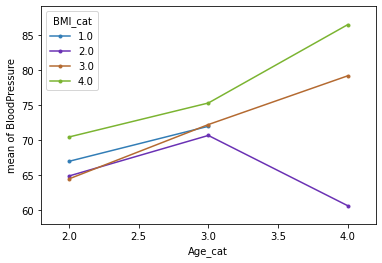

In [66]:
fig = interaction_plot(x=cleaned_df['Age_cat'], trace=cleaned_df['BMI_cat'], response=cleaned_df['BloodPressure'], 
    colors=['#327DB6','#6A31B4', '#B46A31', '#7BB431'])
plt.title("Interaction Plot for Blood Pressure, Age, and BMI")
plt.show()

## HERE I TRY TO REGRESSION :D

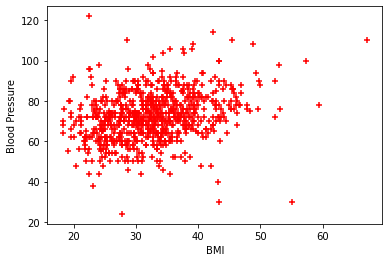

In [68]:
%matplotlib inline
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.scatter(cleaned_df.BMI,cleaned_df.BloodPressure,color='red',marker='+')


In [69]:
from sklearn import linear_model


In [70]:
#single regression for BMI to predict bloodpressure
X = cleaned_df['BMI'].values.reshape(-1,1)
y = cleaned_df['BloodPressure']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [84]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_train,y_train)

0.08035565020057966

In [85]:
#this was weird and troublesome but i guess I had to put my predictor in as an array as well?
reg.predict(np.array(32.5).reshape(1,-1))

array([72.5649505])

In [86]:
print(reg.intercept_)

56.74230977355781


In [87]:
print(reg.coef_)

[0.48685048]


In [88]:
#making predictions
y_pred = reg.predict(X_test)

In [89]:
bmi_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
bmi_results

Actual  Predicted
661    76.0  77.628196
122    74.0  73.100486
113    62.0  73.295226
14     72.0  69.303052
529    65.0  68.718832
..      ...        ...
476    80.0  73.149171
482    58.0  70.276753
230    86.0  78.163731
527    74.0  69.546478
380    72.0  71.737305

[154 rows x 2 columns]

In [90]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.04990462432021
Mean Squared Error: 143.03525070126577
Root Mean Squared Error: 11.95973455814408


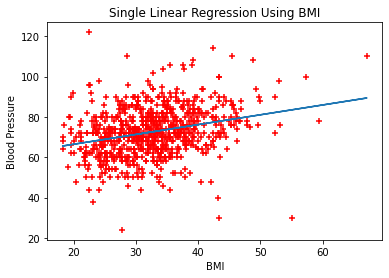

In [95]:
plt.scatter(X, y, color='red',marker='+')
plt.title('Single Linear Regression Using BMI')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')

plt.plot(X, reg.predict(X))

In [96]:
#Single Regression to Predict Blood Pressure by Age
X2 = cleaned_df['Age'].values.reshape(-1,1)
y2 = cleaned_df['BloodPressure']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)


In [97]:
reg2 = linear_model.LinearRegression()
reg2.fit(X2_train, y2_train)

reg2.score(X2_train,y2_train)

0.10169466819925743

In [98]:
reg2.predict(np.array(60).reshape(1,-1))

array([81.0451621])

In [108]:
print(reg2.intercept_)

61.91706910826068


In [100]:
print(reg2.coef_)

[0.31880155]


In [101]:
#making predictions
y2_pred = reg2.predict(X2_test)

In [102]:
age_results = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
age_results

Actual  Predicted
661    76.0  68.930703
122    74.0  69.249505
113    62.0  69.887108
14     72.0  78.175948
529    65.0  71.799917
..      ...        ...
476    80.0  71.162314
482    58.0  70.843513
230    86.0  68.930703
527    74.0  69.568306
380    72.0  69.568306

[154 rows x 2 columns]

In [103]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error: 9.018254259868483
Mean Squared Error: 136.11264325066168
Root Mean Squared Error: 11.666732329605479


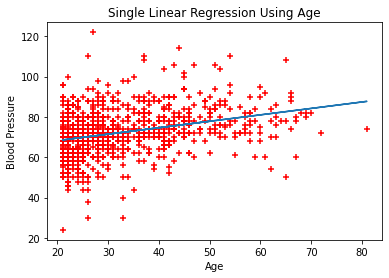

In [105]:
plt.scatter(X2, y2, color='red',marker='+')
plt.title ('Single Linear Regression Using Age')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')

plt.plot(X2, reg2.predict(X2))

In [106]:
##attempt at multi linear regression
X3 = cleaned_df[['Age','BMI']]
y3 = cleaned_df['BloodPressure']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)


In [107]:
reg3 = linear_model.LinearRegression()
reg3.fit(X3_train, y3_train)

reg3.score(X3_train,y3_train)

0.18103888794566247

In [110]:
print(reg3.intercept_)

46.18560352733516


In [112]:
coeff_df = pd.DataFrame(reg3.coef_, X3.columns, columns=['Coefficient'])
coeff_df

Coefficient
Age     0.317217
BMI     0.483784

In [113]:
reg3.predict([[25,35]])

array([71.0484909])

In [116]:
y3_pred = reg3.predict(X3_test)

In [117]:
multi_df = pd.DataFrame({'Actual': y3_test, 'Predicted': y3_pred})
multi_df

Actual  Predicted
661    76.0  73.918736
122    74.0  69.736758
113    62.0  70.564706
14     72.0  74.845322
529    65.0  67.920436
..      ...        ...
476    80.0  71.688440
482    58.0  68.516895
230    86.0  74.450899
527    74.0  66.522349
380    72.0  68.699379

[154 rows x 2 columns]

In [118]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, y3_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, y3_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

Mean Absolute Error: 8.543356450170352
Mean Squared Error: 127.19338813384385
Root Mean Squared Error: 11.278004616679489


In [ ]:
x_surf, y_surf = np.meshgrid(np.linspace(cleaned_df.BMI.min(), cleaned_df.BMI.max(), 100),np.linspace(cleaned_df.BloodPressure.min(), cleaned_df.BloodPressure.max(), 100))
onlyX = pd.DataFrame({'BMI': x_surf.ravel(), 'BloodPressure': y_surf.ravel()})

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cleaned_df['BMI'],cleaned_df['BloodPressure'],cleaned_df['Age'],c='red', marker='o', alpha=0.5)
#ax.plot_surface(x_surf,y_surf,reg3.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('BMI')
ax.set_ylabel('BloodPressure')
ax.set_zlabel('Age')
plt.show()